Importing Packages

In [48]:
# Import necessary libraries
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import cosine, gaussian, butter, filtfilt, sosfreqz
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import IPython.display as ipd


# Load the input audio signal
input_audio, sr = librosa.load('Lab_01.wav')
ipd.display(ipd.Audio(input_audio, rate=sr))

A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the 
amplitude part of the spectral components and observe it. Use numpy.fft.ifft() to inverse 
transform the frequency spectrum to time domain signal.

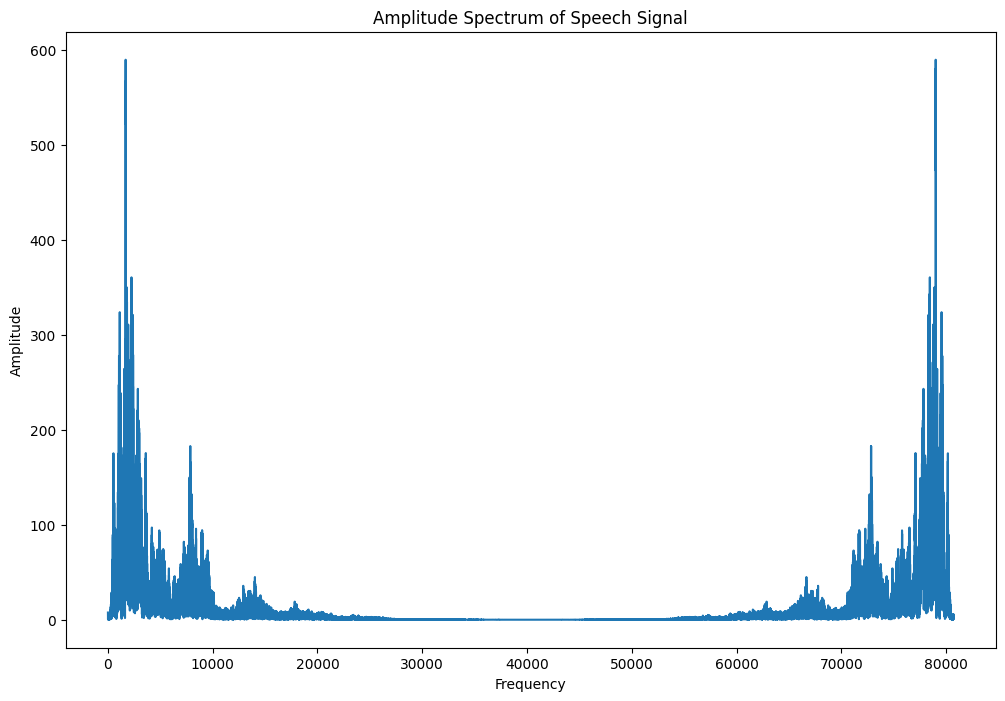

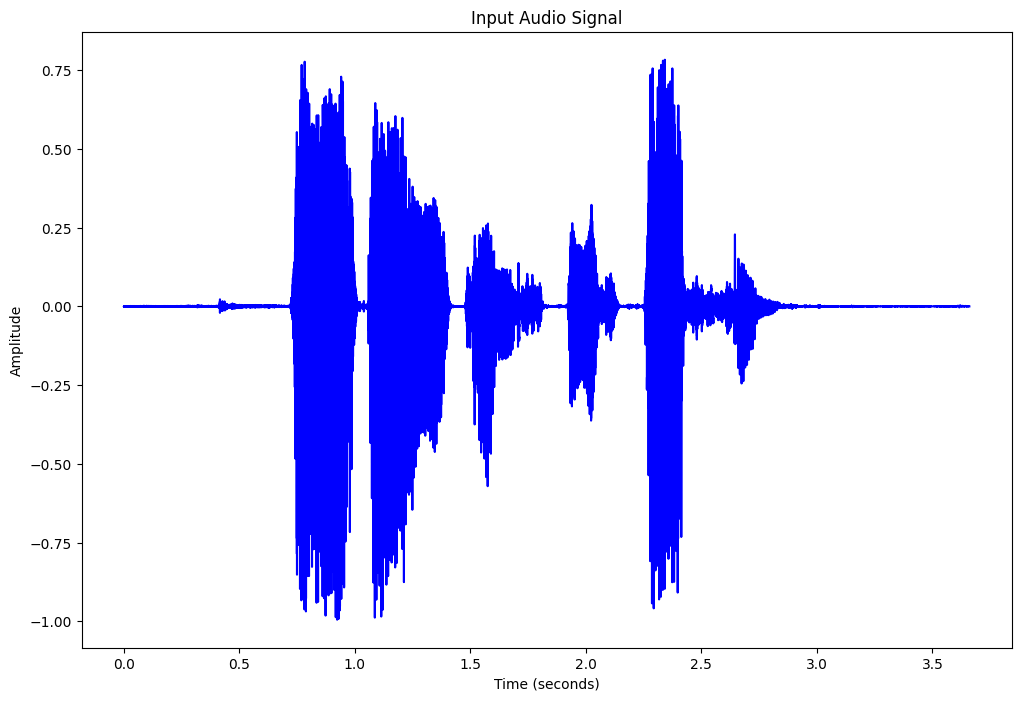

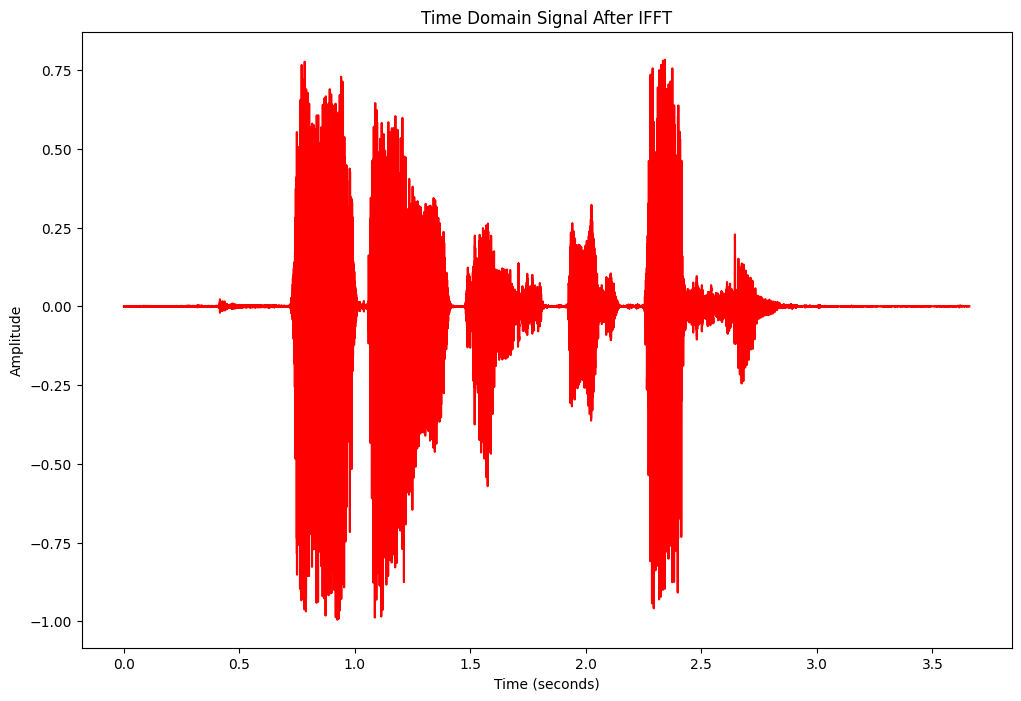

In [49]:
# A1: Transform the speech signal to its spectral domain
spectral_domain = np.fft.fft(input_audio)

# Ploting the amplitude part of the spectral components
plt.figure(figsize=(12, 8))
plt.plot(np.abs(spectral_domain))
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# Inverse transform the frequency spectrum to time domain signal
time_domain_signal = np.fft.ifft(spectral_domain)

time = np.arange(len(input_audio)) / sr

# Ploting input audio signal
plt.figure(figsize=(12, 8))
plt.plot(time, input_audio, color='blue')
plt.title('Input Audio Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# Ploting time domain signal retrieved after IFFT
plt.figure(figsize=(12, 8))
plt.plot(time, np.real(time_domain_signal), color='red')
plt.title('Time Domain Signal After IFFT')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

A2. Use a rectangular window to select the low frequency components from your spectrum. Inverse transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high pass frequencies of sectrum.


The filters being used are listed below:
1. Cosine Filter 
2. Gaussian Filtered 
3. Band Pass Filtered 
4. High Pass Filtered 
5. Low Pass Filtered 
6. Butterworth Filtered 
7. Comb Filtered 
8. Shelving Filtered 
9. Bandstop Filtered 
10. Peaking Filtered 

Writing the function for each of the above filters

In [50]:

# Function to apply rectangular filter
def apply_rectangular_filter(spectral_domain, cutoff_frequency, sr):
    frequencies = np.fft.fftfreq(len(spectral_domain), d=1/sr)
    rectangular_window = np.abs(frequencies) <= cutoff_frequency
    filtered_spectrum_rectangular = spectral_domain * rectangular_window
    filtered_time_domain_signal_rectangular = np.fft.ifft(filtered_spectrum_rectangular)
    return filtered_time_domain_signal_rectangular

# Function to apply band-pass filter
def apply_bandpass_filter(spectral_domain, low_cutoff, high_cutoff, sr):
    frequencies = np.fft.fftfreq(len(spectral_domain), d=1/sr)
    bandpass_window = (np.abs(frequencies) >= low_cutoff) & (np.abs(frequencies) <= high_cutoff)
    filtered_spectrum_bandpass = spectral_domain * bandpass_window
    filtered_time_domain_signal_bandpass = np.fft.ifft(filtered_spectrum_bandpass)
    return filtered_time_domain_signal_bandpass

# Function to apply cosine filter
def apply_cosine_filter(spectral_domain, window_length):
    cosine_window = np.cos(np.linspace(-np.pi / 2, np.pi / 2, window_length))
    cosine_window = np.pad(cosine_window, (0, len(spectral_domain) - len(cosine_window)), 'constant')
    filtered_spectrum_cosine = spectral_domain * cosine_window
    filtered_time_domain_signal_cosine = np.fft.ifft(filtered_spectrum_cosine)
    return filtered_time_domain_signal_cosine

# Function to apply Gaussian filter
def apply_gaussian_filter(spectral_domain, window_length):
    gaussian_window = np.exp(-0.5 * (np.linspace(-1, 1, window_length) / (0.5)) ** 2)
    gaussian_window = np.pad(gaussian_window, (0, len(spectral_domain) - len(gaussian_window)), 'constant')
    filtered_spectrum_gaussian = spectral_domain * gaussian_window
    filtered_time_domain_signal_gaussian = np.fft.ifft(filtered_spectrum_gaussian)
    return filtered_time_domain_signal_gaussian

# Function to apply High-pass filter
def apply_highpass_filter(spectral_domain, cutoff_frequency, sr):
    nyquist_frequency = sr / 2
    normalized_cutoff = cutoff_frequency / nyquist_frequency
    b, a = signal.butter(4, normalized_cutoff, btype='high', analog=False)
    filtered_signal = signal.filtfilt(b, a, np.real(spectral_domain))
    return filtered_signal

# Function to apply Low-pass filter
def apply_lowpass_filter(spectral_domain, cutoff_frequency, sr):
    nyquist_frequency = sr / 2
    normalized_cutoff = cutoff_frequency / nyquist_frequency
    b, a = signal.butter(4, normalized_cutoff, btype='low', analog=False)
    filtered_signal = signal.filtfilt(b, a, np.real(spectral_domain))
    return filtered_signal

# Function to apply Butterworth filter
def apply_butterworth_filter(spectral_domain, cutoff_frequency_low, cutoff_frequency_high, sr):
    nyquist_frequency = sr / 2
    normalized_cutoff_low = cutoff_frequency_low / nyquist_frequency
    normalized_cutoff_high = cutoff_frequency_high / nyquist_frequency
    b, a = signal.butter(4, [normalized_cutoff_low, normalized_cutoff_high], btype='band', analog=False)
    filtered_signal = signal.filtfilt(b, a, np.real(spectral_domain))
    return filtered_signal

# Function to apply Comb filter
def apply_comb_filter(spectral_domain, delay, gain):
    b = [1] + [0] * (delay - 1) + [gain]
    a = [1]
    filtered_signal = signal.lfilter(b, a, np.real(spectral_domain))
    return filtered_signal
def apply_shelving_filter(spectral_domain, cutoff_frequency, gain, sr):
    nyquist_frequency = sr / 2
    normalized_cutoff = cutoff_frequency / nyquist_frequency
    b, a = signal.butter(4, normalized_cutoff, btype='low', analog=False)
    b_shelving = (10**(gain/20) - 1) * (b - 1)
    a_shelving = a
    filtered_signal = signal.filtfilt(b_shelving, a_shelving, np.real(spectral_domain))
    return filtered_signal

# Function to apply Band-stop filter (Notch filter)
def apply_bandstop_filter(spectral_domain, center_frequency, Q):
    b, a = signal.iirnotch(center_frequency, Q, fs=sr)
    filtered_signal = signal.filtfilt(b, a, np.real(spectral_domain))
    return filtered_signal

# Function to apply Peaking filter
def apply_peaking_filter(spectral_domain, center_frequency, Q, gain, sr):
    b, a = signal.iirpeak(center_frequency, Q, fs=sr)
    filtered_signal = signal.filtfilt(b, a, np.real(spectral_domain))
    return filtered_signal



Calling the functions are retrieving the filtered audio signals

In [51]:
# Using a rectangular window to select the low frequency components
filtered_time_domain_signal_rectangular = apply_rectangular_filter(spectral_domain, 1000, sr)
wavfile.write('filtered_sound_rectangular.wav', sr, np.real(filtered_time_domain_signal_rectangular))

# Function to apply band-pass filter
filtered_time_domain_signal_bandpass = apply_bandpass_filter(spectral_domain, 1000, 4000, sr)
wavfile.write('filtered_sound_bandpass.wav', sr, np.real(filtered_time_domain_signal_bandpass))

# Function to apply cosine filter
filtered_time_domain_signal_cosine = apply_cosine_filter(spectral_domain, 2000)
wavfile.write('filtered_sound_cosine.wav', sr, np.real(filtered_time_domain_signal_cosine))

# Function to apply Gaussian filter
filtered_time_domain_signal_gaussian = apply_gaussian_filter(spectral_domain, 2000)
wavfile.write('filtered_sound_gaussian.wav', sr, np.real(filtered_time_domain_signal_gaussian))

# Function to apply High-pass filter
filtered_time_domain_signal_highpass = apply_highpass_filter(spectral_domain, 1000, sr)
wavfile.write('filtered_sound_highpass.wav', sr, np.real(filtered_time_domain_signal_highpass))

# Function to apply Low-pass filter
filtered_time_domain_signal_lowpass = apply_lowpass_filter(spectral_domain, 4000, sr)
wavfile.write('filtered_sound_lowpass.wav', sr, np.real(filtered_time_domain_signal_lowpass))

# Function to apply Butterworth filter
filtered_time_domain_signal_butterworth = apply_butterworth_filter(spectral_domain, 1000, 4000, sr)
wavfile.write('filtered_sound_butterworth.wav', sr, np.real(filtered_time_domain_signal_butterworth))

# Function to apply Comb filter
filtered_time_domain_signal_comb = apply_comb_filter(spectral_domain, 1000, 0.5)
wavfile.write('filtered_sound_comb.wav', sr, np.real(filtered_time_domain_signal_comb))

# Function to apply Shelving filter
filtered_time_domain_signal_shelving = apply_shelving_filter(spectral_domain, 1000, 10, sr)
wavfile.write('filtered_sound_shelving.wav', sr, np.real(filtered_time_domain_signal_shelving))

# Function to apply Band-stop filter (Notch filter)
filtered_time_domain_signal_bandstop = apply_bandstop_filter(spectral_domain, 2000, 30)
wavfile.write('filtered_sound_bandstop.wav', sr, np.real(filtered_time_domain_signal_bandstop))

# Function to apply Peaking filter
filtered_time_domain_signal_peaking = apply_peaking_filter(spectral_domain, 2000, 30, 5, sr)
wavfile.write('filtered_sound_peaking.wav', sr, np.real(filtered_time_domain_signal_peaking))



Listening and plotting all the retrieved filtered audio signals

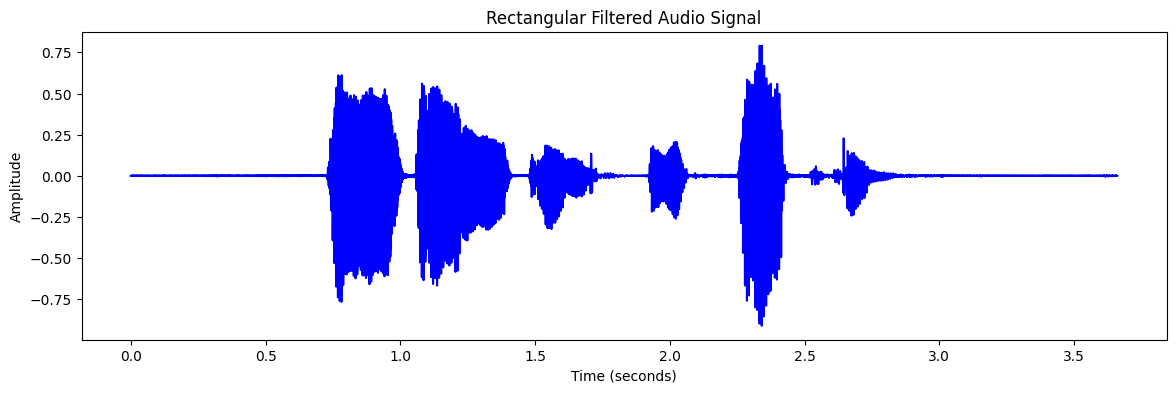

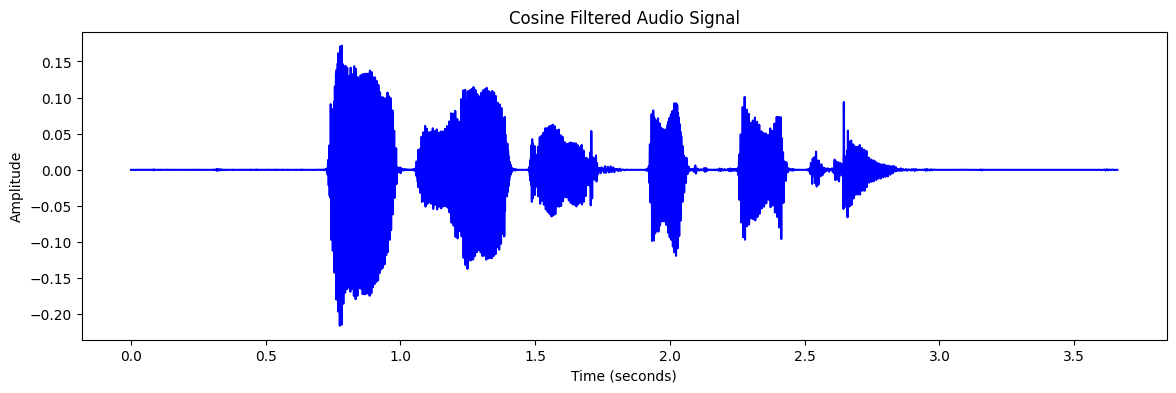

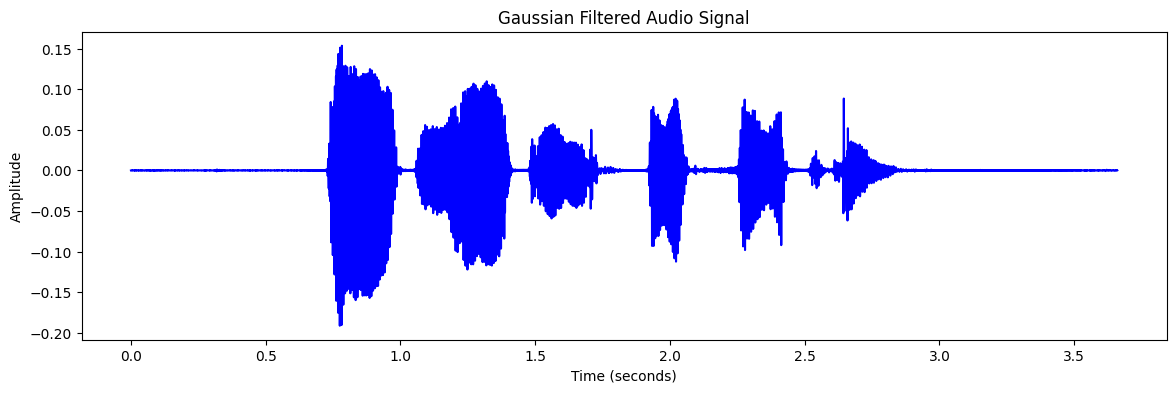

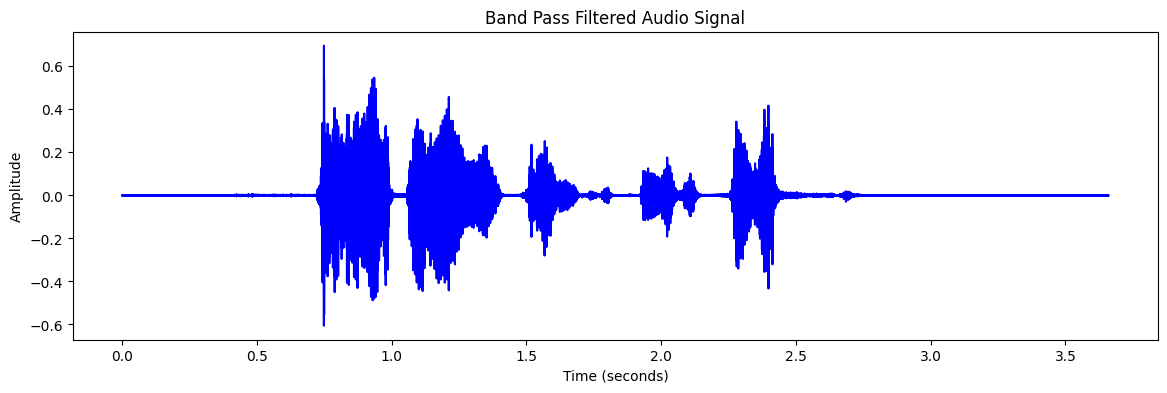

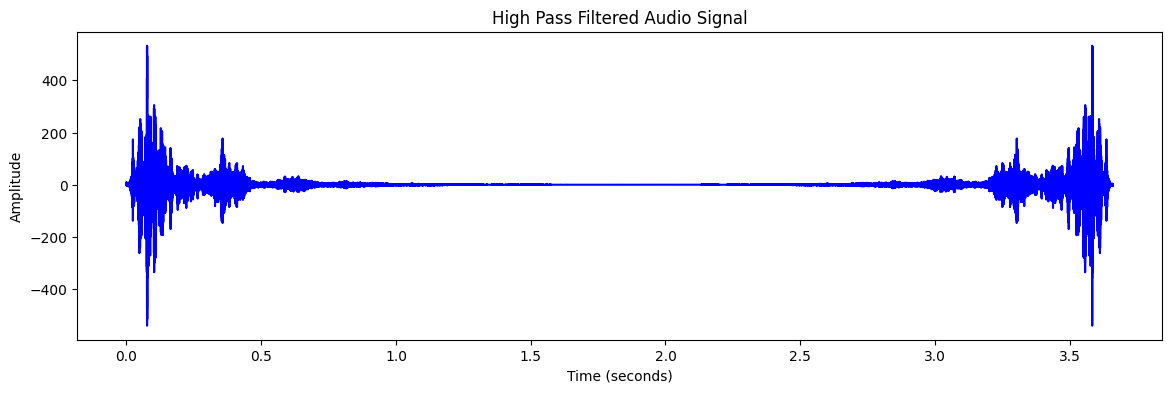

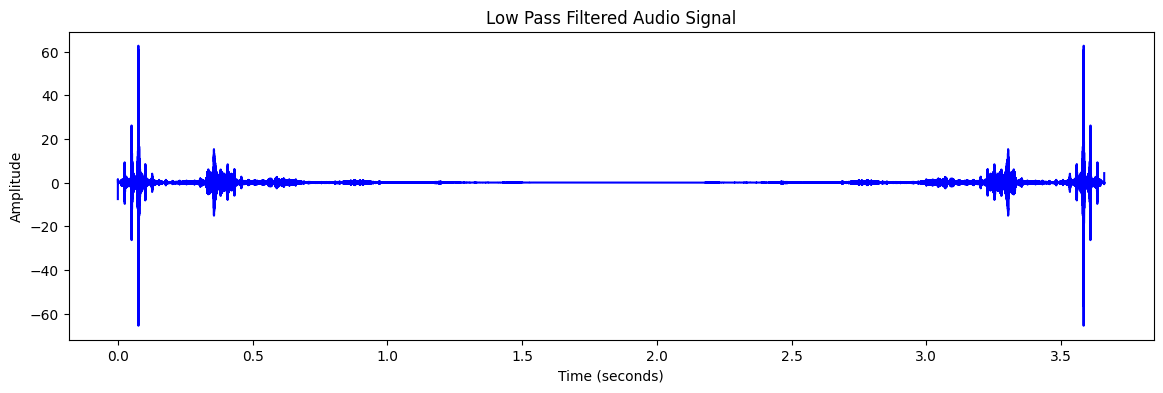

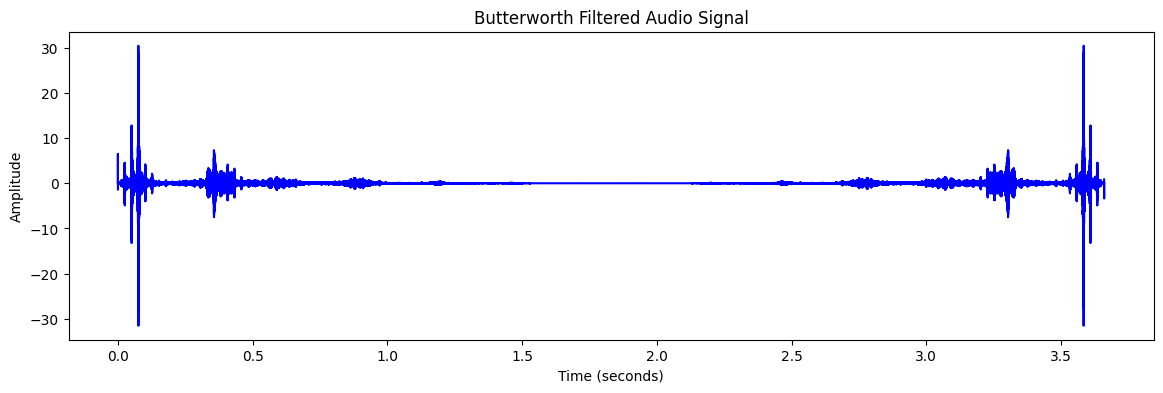

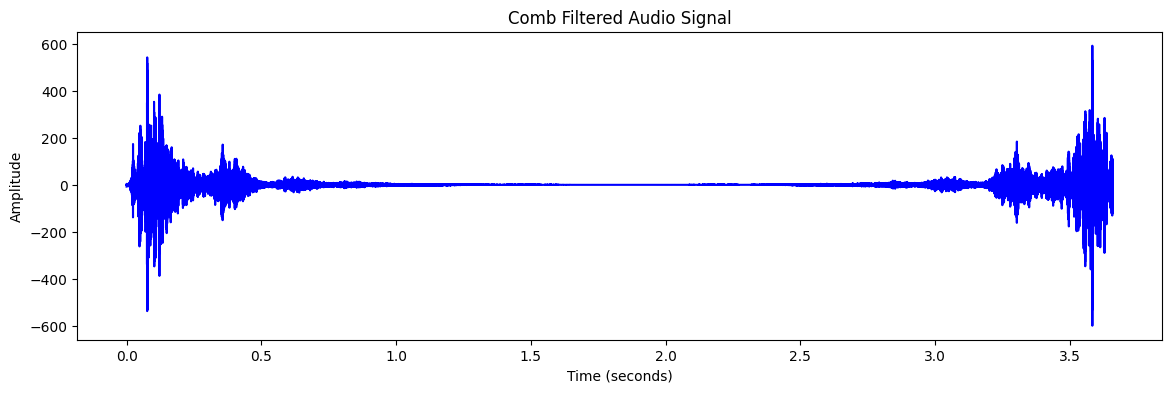

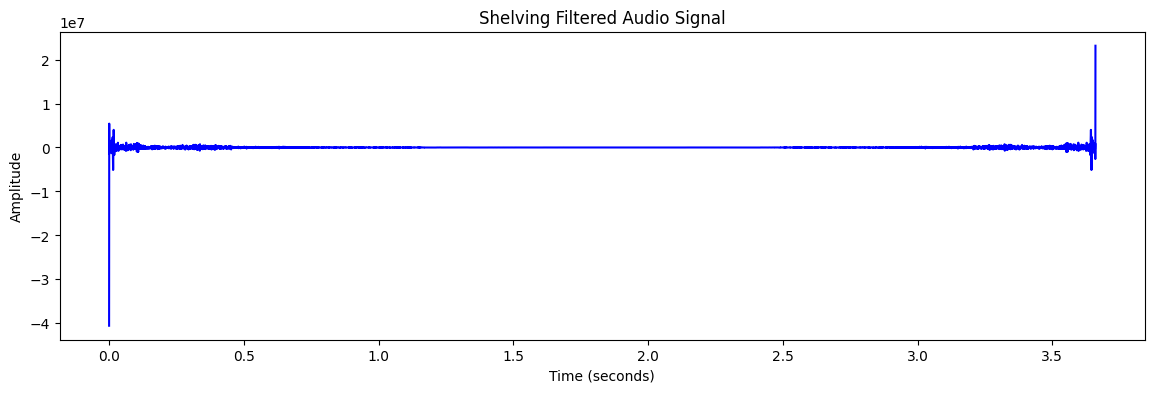

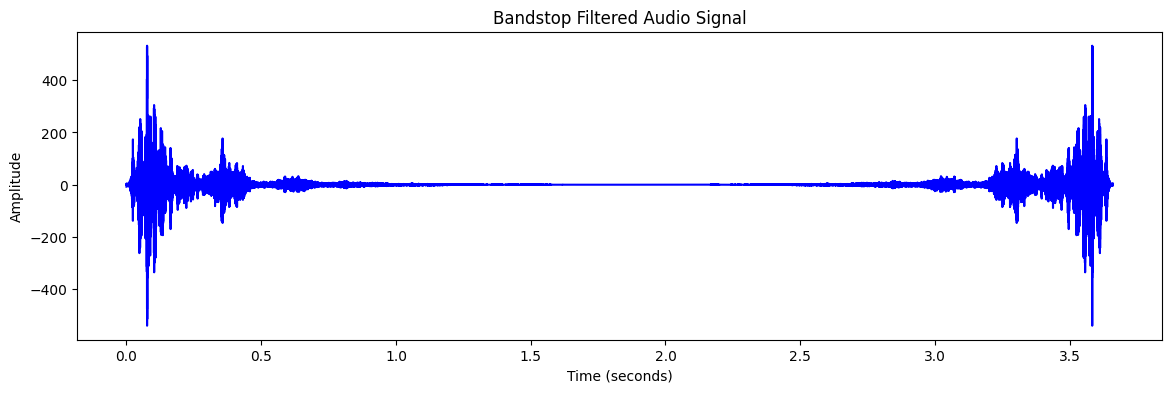

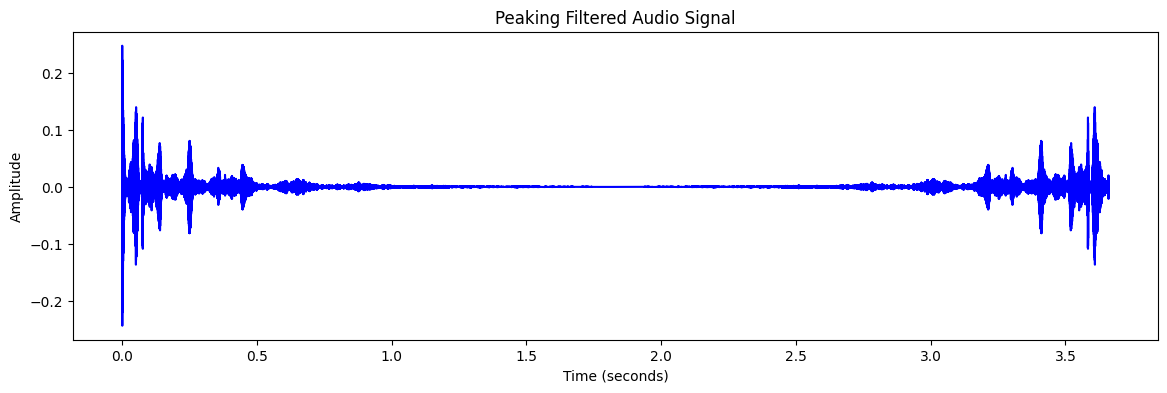

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from IPython.display import Audio, display

# Load the audio signals
sr, audio_signal_rectangular = wavfile.read('filtered_sound_rectangular.wav')
sr, audio_signal_cosine = wavfile.read('filtered_sound_cosine.wav')
sr, audio_signal_gaussian = wavfile.read('filtered_sound_gaussian.wav')
sr, audio_signal_bandpass = wavfile.read('filtered_sound_bandpass.wav')
sr, audio_signal_highpass = wavfile.read('filtered_sound_highpass.wav')
sr, audio_signal_lowpass = wavfile.read('filtered_sound_lowpass.wav')
sr, audio_signal_butterworth = wavfile.read('filtered_sound_butterworth.wav')
sr, audio_signal_comb = wavfile.read('filtered_sound_comb.wav')
sr, audio_signal_shelving = wavfile.read('filtered_sound_shelving.wav')
sr, audio_signal_bandstop = wavfile.read('filtered_sound_bandstop.wav')
sr, audio_signal_peaking = wavfile.read('filtered_sound_peaking.wav')

# Create time axis
time = np.arange(len(audio_signal_rectangular)) / sr

# Display and plot audio signals
for signal, title in [(audio_signal_rectangular, 'Rectangular Filtered Audio Signal'),
                      (audio_signal_cosine, 'Cosine Filtered Audio Signal'),
                      (audio_signal_gaussian, 'Gaussian Filtered Audio Signal'),
                      (audio_signal_bandpass, 'Band Pass Filtered Audio Signal'),
                      (audio_signal_highpass, 'High Pass Filtered Audio Signal'),
                      (audio_signal_lowpass, 'Low Pass Filtered Audio Signal'),
                      (audio_signal_butterworth, 'Butterworth Filtered Audio Signal'),
                      (audio_signal_comb, 'Comb Filtered Audio Signal'),
                      (audio_signal_shelving, 'Shelving Filtered Audio Signal'),
                      (audio_signal_bandstop, 'Bandstop Filtered Audio Signal'),
                      (audio_signal_peaking, 'Peaking Filtered Audio Signal')
                      
                      
                      
                      ]:
    display(Audio(signal, rate=sr))
    
    plt.figure(figsize=(14, 4))
    plt.plot(time, signal, color='blue')
    plt.title(title)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.show()
